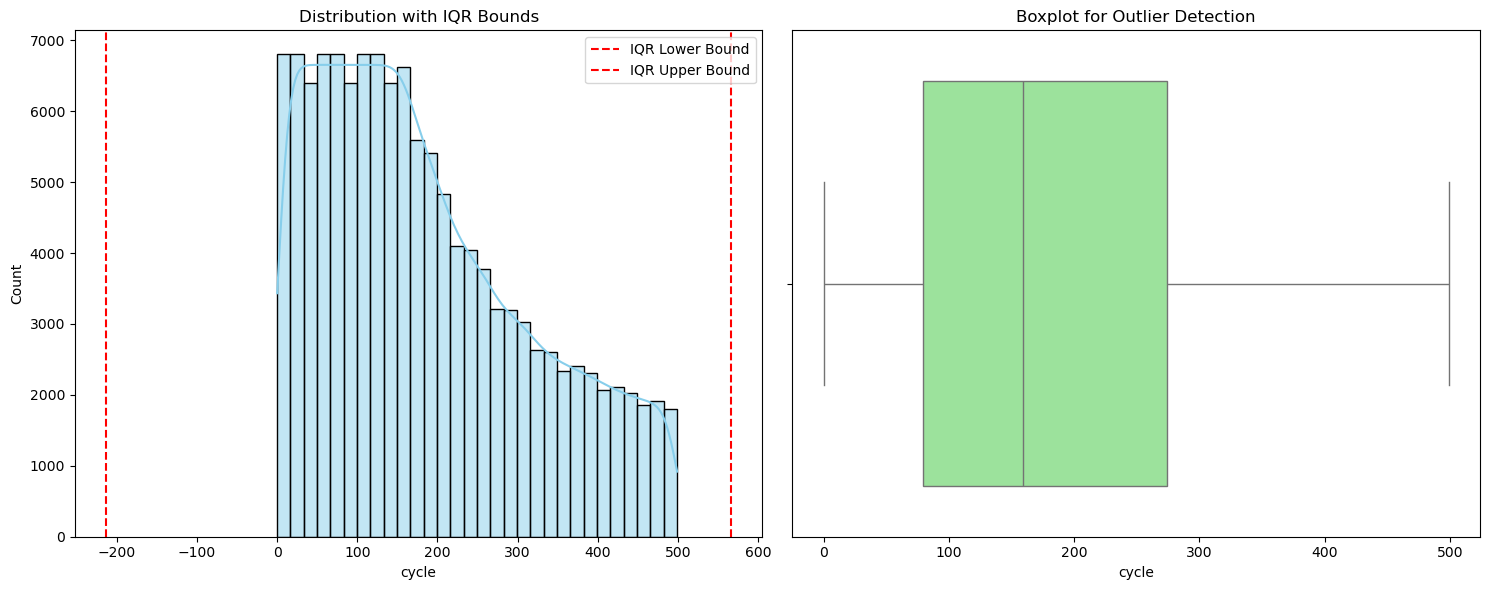

--- 이상치 확인 결과 ---
IQR 기준 이상치 개수: 0개
Z-Score 기준 이상치 개수: 0개


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 1. 데이터 로드 및 전처리
file_path = r'C:\Users\a6701\OneDrive - UOU\codingon\프로젝트1\battery_failure_surfaces.csv'
df = pd.read_csv(file_path)
# NMC 화학 조성만 필터링
nmc_df = df[df['cell_chemistry'] == 'Li-ion NMC'].copy()
data = nmc_df['cycle'].dropna()

# 2. IQR 방식 계산
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = data[(data < lower_bound) | (data > upper_bound)]

# 3. Z-Score 방식 계산
z_scores = np.abs(stats.zscore(data))
outliers_z = data[z_scores > 3]

# 4. 시각화
plt.figure(figsize=(15, 6))

# 히스토그램 + 경계선
plt.subplot(1, 2, 1)
sns.histplot(data, bins=30, kde=True, color='skyblue')
plt.axvline(lower_bound, color='red', linestyle='--', label='IQR Lower Bound')
plt.axvline(upper_bound, color='red', linestyle='--', label='IQR Upper Bound')
plt.title('Distribution with IQR Bounds')
plt.legend()

# 박스플롯 (이상치 시각화의 정석)
plt.subplot(1, 2, 2)
sns.boxplot(x=data, color='lightgreen')
plt.title('Boxplot for Outlier Detection')

plt.tight_layout()
plt.show()

print(f"--- 이상치 확인 결과 ---")
print(f"IQR 기준 이상치 개수: {len(outliers_iqr)}개")
print(f"Z-Score 기준 이상치 개수: {len(outliers_z)}개")

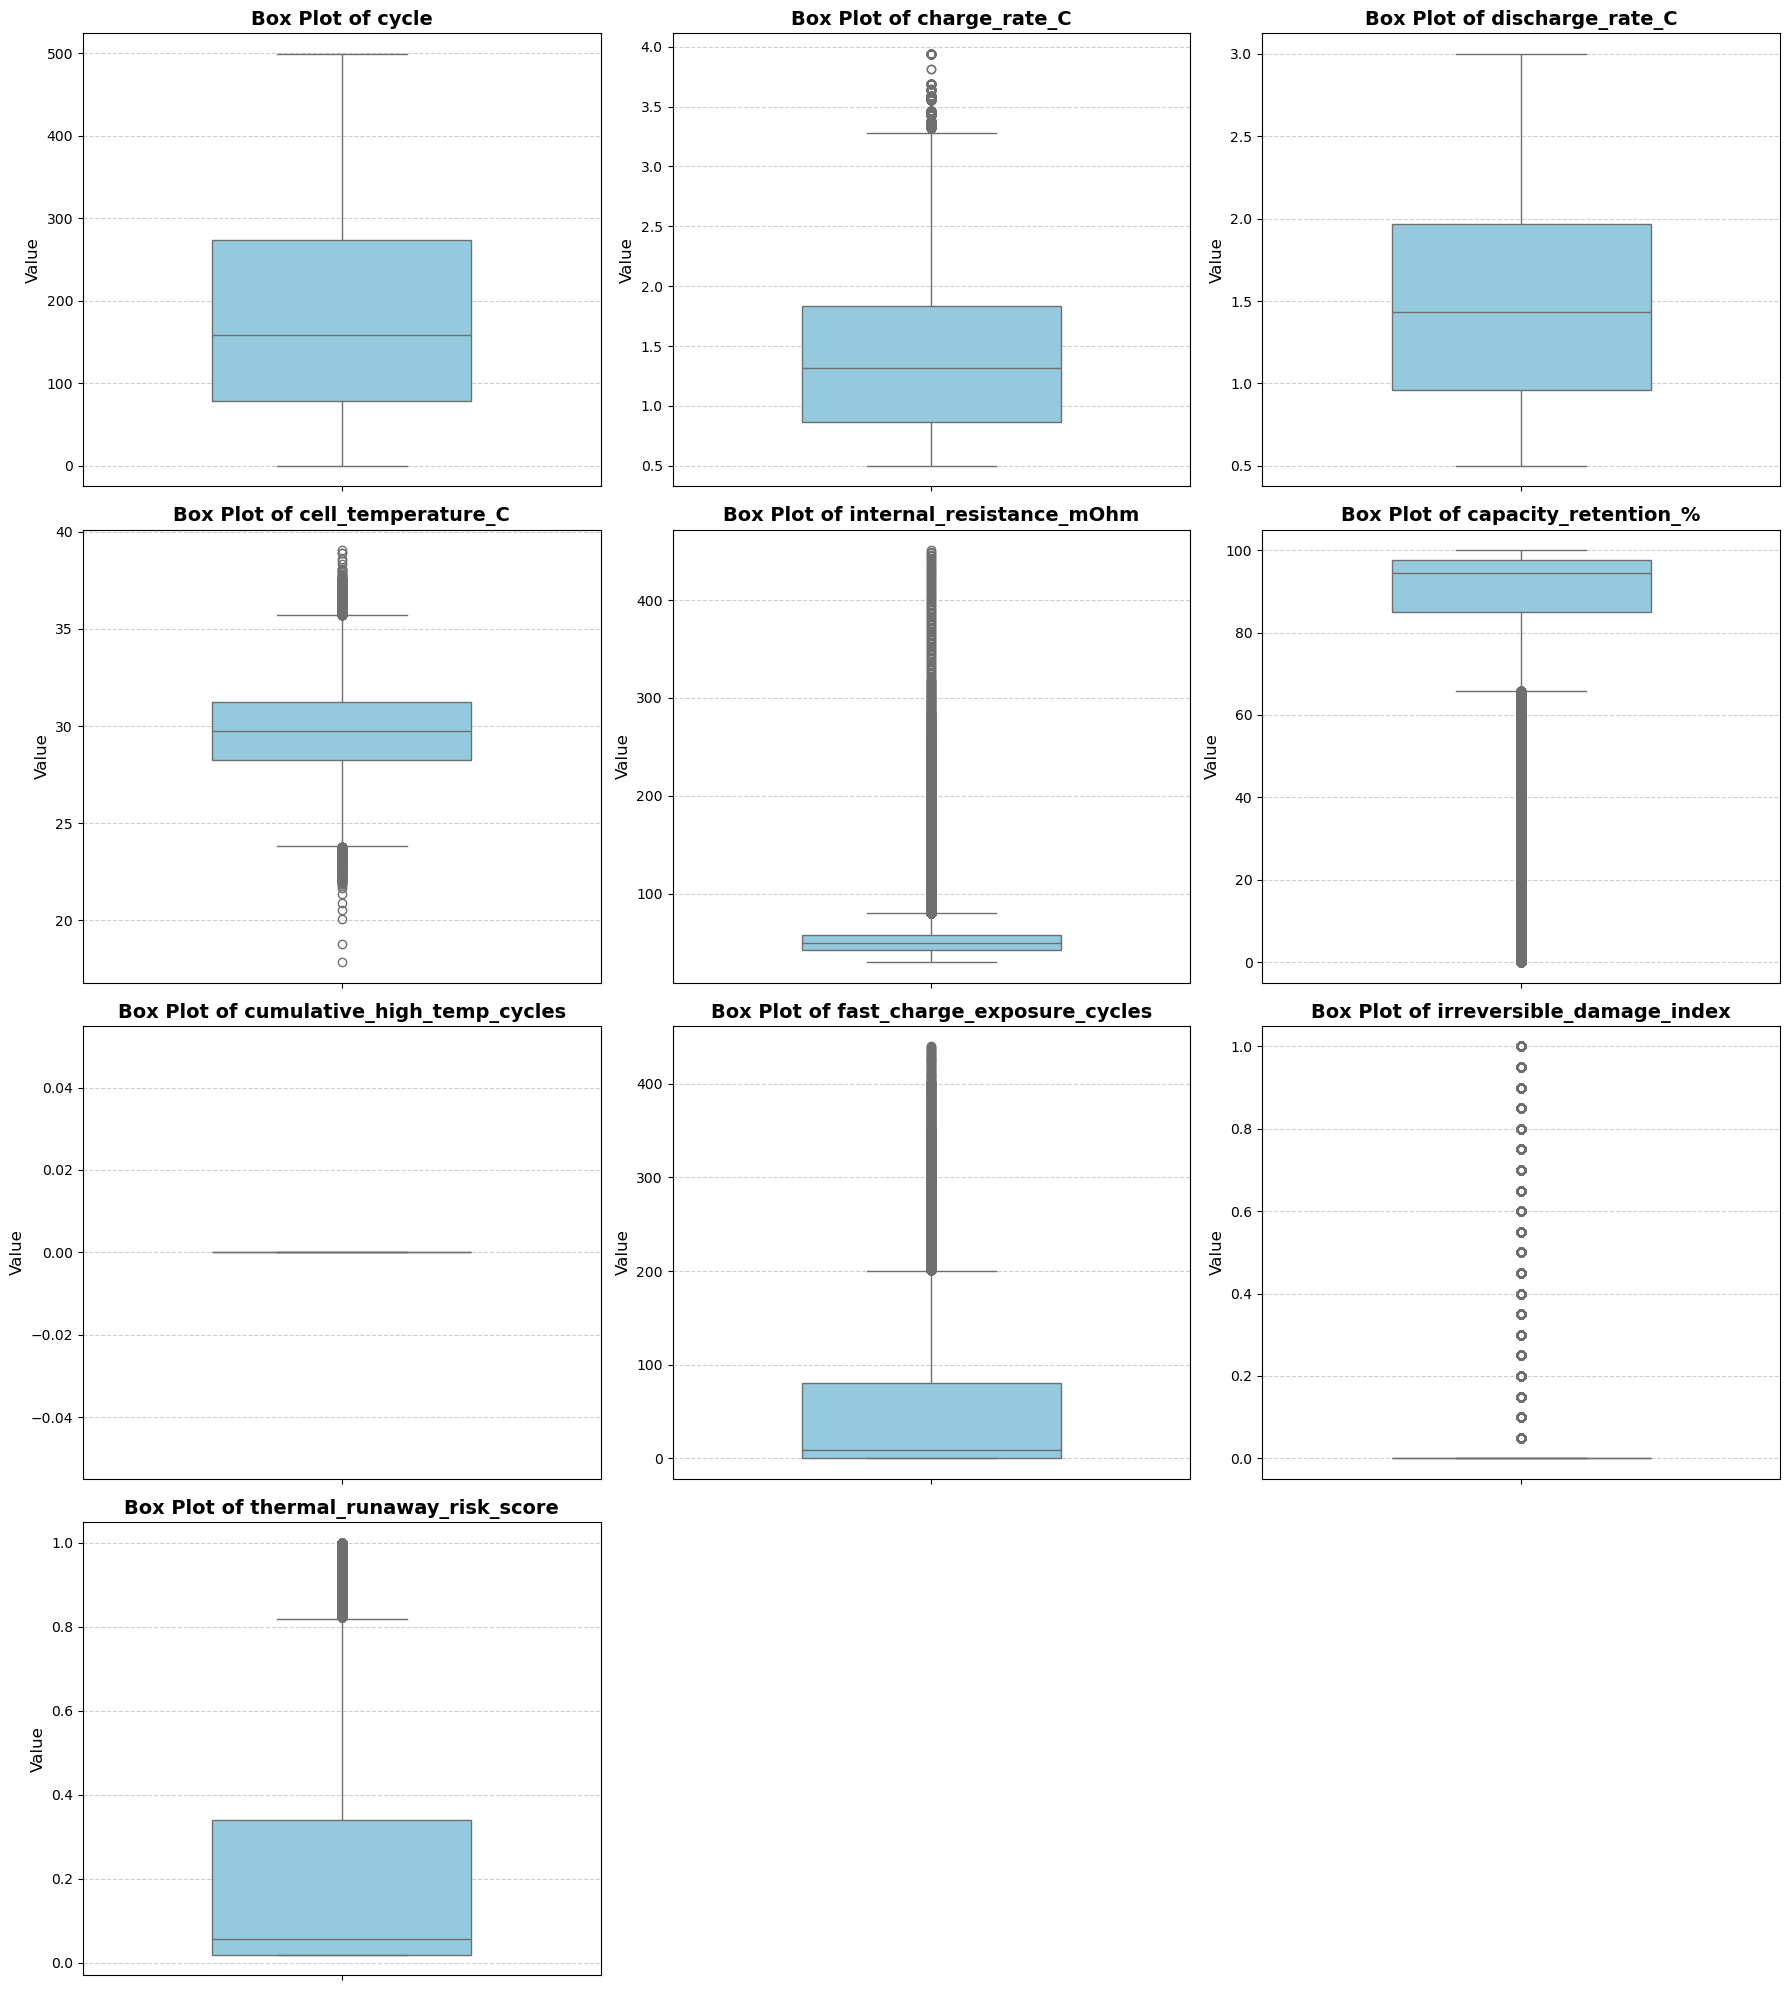

 [ 각 독립변수별 이상치(Outlier) 통계 요약 ]
- cycle                       :    0개의 이상치 발견
- charge_rate_C               :  617개의 이상치 발견
- discharge_rate_C            :    0개의 이상치 발견
- cell_temperature_C          :  755개의 이상치 발견
- internal_resistance_mOhm    : 8436개의 이상치 발견
- capacity_retention_%        : 11190개의 이상치 발견
- cumulative_high_temp_cycles :    0개의 이상치 발견
- fast_charge_exposure_cycles : 3250개의 이상치 발견
- irreversible_damage_index   : 17930개의 이상치 발견
- thermal_runaway_risk_score  : 4109개의 이상치 발견


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 파일 경로 설정 (사용자 지정 경로)
file_path = r'C:\Users\a6701\OneDrive - UOU\codingon\프로젝트1\battery_failure_surfaces.csv'

try:
    # 2. 데이터 불러오기
    df = pd.read_csv(file_path)

    # 3. Li-ion NMC 데이터 필터링
    nmc_df = df[df['cell_chemistry'] == 'Li-ion NMC'].copy()

    # 4. 독립변수 리스트 설정
    # 종속변수(결과)인 thermal_runaway_risk_score를 제외한 나머지 수치형 변수들을 선택합니다.
    independent_vars = [
        'cycle', 'charge_rate_C', 'discharge_rate_C', 'cell_temperature_C', 
        'internal_resistance_mOhm', 'capacity_retention_%', 
        'cumulative_high_temp_cycles', 'fast_charge_exposure_cycles', 
        'irreversible_damage_index', 'thermal_runaway_risk_score'
    ]

    # 5. 시각화 (Box Plot - 서브플롯 구성)
    # 변수 개수에 맞춰 행과 열을 계산합니다.
    num_vars = len(independent_vars)
    cols = 3  # 한 줄에 3개씩 배치
    rows = (num_vars + cols - 1) // cols

    plt.figure(figsize=(18, rows * 5))
    
    for i, var in enumerate(independent_vars, 1):
        plt.subplot(rows, cols, i)
        # 박스플롯 그리기
        sns.boxplot(y=nmc_df[var], color='skyblue', width=0.5)
        
        # 그래프 제목 및 라벨 설정
        plt.title(f'Box Plot of {var}', fontsize=14, fontweight='bold')
        plt.ylabel('Value', fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.6)

    # 전체 레이아웃 조정 및 출력
    plt.tight_layout()
    plt.show()

    # 6. 각 변수별 이상치 통계 정보 출력
    print("="*60)
    print(" [ 각 독립변수별 이상치(Outlier) 통계 요약 ]")
    print("="*60)
    
    for var in independent_vars:
        Q1 = nmc_df[var].quantile(0.25)
        Q3 = nmc_df[var].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = nmc_df[(nmc_df[var] < lower_bound) | (nmc_df[var] > upper_bound)]
        print(f"- {var:28s}: {len(outliers):4d}개의 이상치 발견")
    print("="*60)

except FileNotFoundError:
    print(f"파일을 찾을 수 없습니다: {file_path}")
except Exception as e:
    print(f"오류가 발생했습니다: {e}")